In [ ]:
from fastai.vision.all import *
import pandas as pd

In [ ]:
# path = untar_data(URLs.IMAGENETTE_320)
# path.ls()

In [ ]:
from datasets import load_dataset
#dataset = load_dataset('Maysee/tiny-imagenet',cache_dir='data/imagenet_tiny') 
dataset = load_dataset('imagenet-1k', split='valid') 

In [ ]:
dataset

In [ ]:
train, val = dataset['train'], dataset['valid']

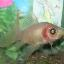

In [ ]:
train['image'][0]

In [ ]:
train_data = {'image': train['image'], 'label': train['label'], 'is_val':False}
train_df = pd.DataFrame.from_dict(train_data)

val_data = {'image': val['image'], 'label': val['label'], 'is_val':True}
val_df = pd.DataFrame.from_dict(val_data)

df = pd.concat([train_df, val_df]).reset_index(drop=True)

In [ ]:
df.head()

,image,label,is_val
0,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64>,0,False
1,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64>,0,False
2,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64>,0,False
3,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64>,0,False
4,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64>,0,False


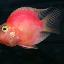

In [ ]:
df.image[10]

In [ ]:
dls = ImageDataLoaders.from_df(df,fn_col='image', label_col='label', valid_col='is_val')

FileNotFoundError: [Errno 2] No such file or directory: './<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64>'

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(1)